In [20]:
# Task 03 - Customer Purchase Prediction

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# --- Load Dataset ---
df = pd.read_csv('bank-full.csv', sep=';')
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# --- Split Data ---
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# --- Encode Categorical Variables ---
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [26]:
# --- Train Model ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# --- Predict and Evaluate ---
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [29]:
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Model Accuracy: 0.8740

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

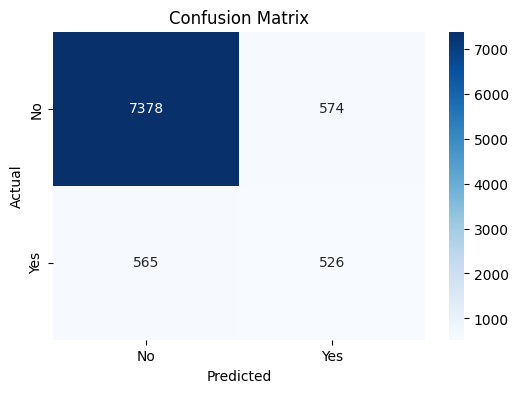

In [31]:
# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

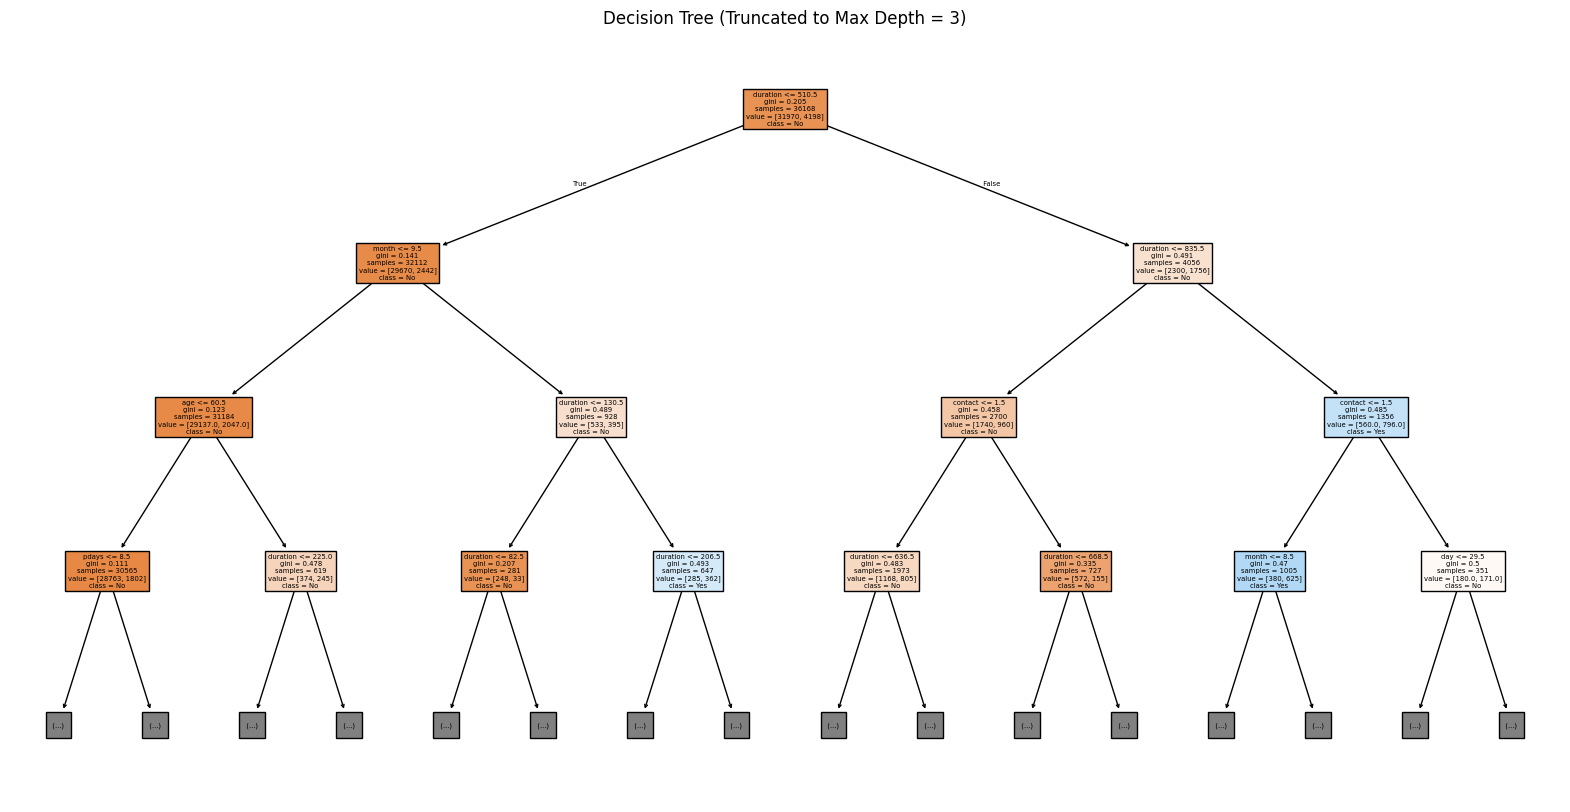

In [32]:
# --- Visualize Decision Tree ---
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title('Decision Tree (Truncated to Max Depth = 3)')
plt.show()